# K-Means

In [45]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [46]:
%run kmeans

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.

Algorithm:

The way kmeans algorithm works is as follows:

1.> Specify number of clusters K.<br> 
2.> Initialize centroids by randomly selecting K data points for the centroids without replacement.<br> 
3.> Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.<br> 
  &emsp;  a.>Compute the sum of the squared distance between data points and all centroids.<br> 
  &emsp;  b.>Assign each data point to the closest cluster (centroid).<br> 
  &emsp;  c.>Recompute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

The approach kmeans follows to solve the problem is called **Expectation-Maximization**. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster

## Kmeans demonstration

First, let's generate a two-dimensional dataset containing six distinct blobs

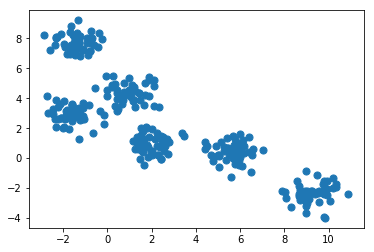

In [47]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [34]:
k=6
centroids_X, clusters_X = kmeans(X, k=k, tolerance=.01)

In [35]:
y_kmeans=np.zeros(300)
for i in range(k):
        y_kmeans[clusters_X[i]]=i

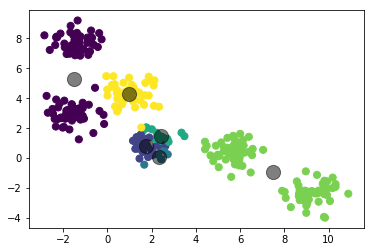

In [36]:
plt.scatter(X[:, 0], X[:, 1] ,c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids_X[:, 0], centroids_X[:, 1], c='black', s=200,
            alpha=0.5)

One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids.
<br>So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it and at the same time more than one clusters might end up linked with a single centroid. Similarly, more than one centroids might be initialized into the same cluster resulting in poor clustering.

To overcome the above-mentioned drawback we use K-means++. This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. 

## kmeans++

Initialization algorithm:
    
1.> Randomly select the first centroid from the data points.<br>
2.> For each data point compute its distance from the nearest, previously choosen centroid.<br>
3.>Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)<br>
4.>Repeat steps 2 and 3 untill k centroids have been sampled    

In [37]:
k=6
centroids_X, clusters_X = kmeans(X, k=k, centroids='kmeans++', 
                                 tolerance=.01)

In [38]:
y_kmeans=np.zeros(300)
for i in range(k):
        y_kmeans[clusters_X[i]]=i

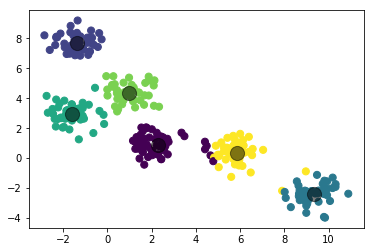

In [39]:
plt.scatter(X[:, 0], X[:, 1] ,c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids_X[:, 0], centroids_X[:, 1], c='black', s=200, 
            alpha=0.5)

Note: Although the initialization in K-means++ is computationally more expensive than the standard K-means algorithm, the run-time for convergence to optimum is drastically reduced for K-means++. This is because the centroids that are initially chosen are likely to lie in different clusters already.

## Spectral clustering

**Drawback on k-means clustering:**

Kmeans algorithm is good in capturing structure of the data if clusters have a spherical-like shape. It always try to construct a nice spherical shape around the centroid. That means, the minute the clusters have a complicated geometric shapes, kmeans does a poor job in clustering the data.

In [40]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

In [41]:
k=2
centroids, clusters = kmeans(X, k=k, centroids='kmeans++',
                             tolerance=.01)

In [42]:
y_kmeans=np.zeros(200)
for i in range(k):
        y_kmeans[clusters[i]]=i

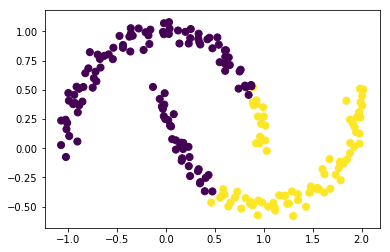

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');

**Spectral Clustering work very well in such scenarios**

/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


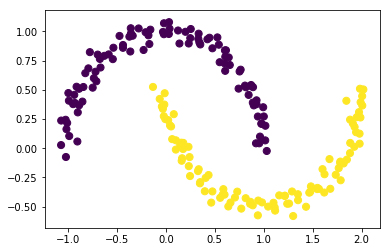

In [44]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# Applications of k-means clustering

## Compressing a coloured image

In this part, we’ll implement kmeans to compress an image. 

For each pixel location we would have 3 8-bit integers that specify the red, green, and blue intensity values. Our goal is to reduce the number of colors to 32 and represent (compress) the photo using those 32 colors only. To pick which colors to use, we’ll use kmeans algorithm on the image and treat every pixel as a data point. 

In [48]:
img = mpimg.imread('website.jpg')

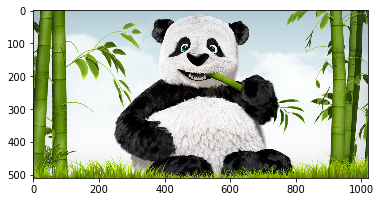

In [49]:
imgplot = plt.imshow(img)

In [50]:
image_reshaped_2D = np.reshape(img, 
                               (img.shape[0] * img.shape[1], img.shape[2]))  

In [51]:
k1=32
centroids, clusters = kmeans(image_reshaped_2D, k=k1, 
                             centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)

In [52]:
def reassign_colors(X, centroids, clusters, k):
    m, n = X.shape 
    ret_X=np.zeros((m, n))
    for i in range(k):
        ret_X[clusters[i]]=centroids[i]
    return ret_X    

In [53]:
recovered_img = reassign_colors(image_reshaped_2D,
                                centroids, clusters, k1)

In [54]:
recovered_img_3D = np.reshape(recovered_img,
                              (img.shape[0], img.shape[1], img.shape[2])) 

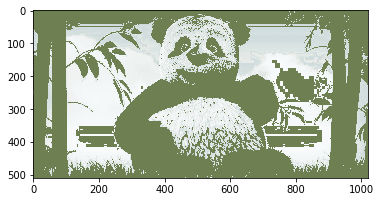

In [55]:
plt.imshow((recovered_img_3D).astype(np.uint8))

## k-means on digits

Here we will attempt to use k-means to try to identify similar digits without using the original label information

We will start by loading the digits and then finding the KMeans clusters. The digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [80]:
k=10
centroids, clusters = kmeans(digits.data, k=k, 
                             centroids='kmeans++', tolerance=.01)

In [81]:
centroids.shape

(10, 64)

In [82]:
y_kmeans=np.zeros(1797)
for i in range(k):
    y_kmeans[clusters[i]]=i

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

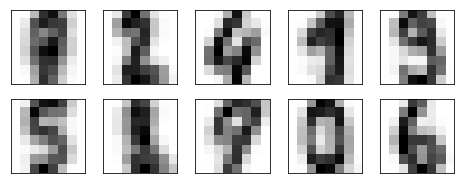

In [83]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centroids.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [84]:
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(10):
    mask = (y_kmeans == i)
    labels[mask] = mode(digits.target[mask])[0]

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.5492487479131887

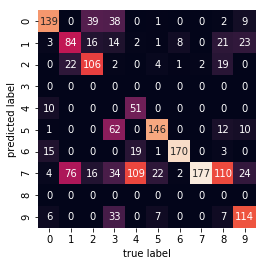

In [86]:
import seaborn as sns;
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights, nines and ones. But this still shows that using k-means, we can essentially build a digit classifier without reference to any known labels!